#### Jupiter Notebook created by Pietro to test Tisserand Plane for GA sequences design. Required modules: astropy, poliastro

TisserandKind.APSIS	TisserandKind.ENERGY	TisserandKind.PERIOD	

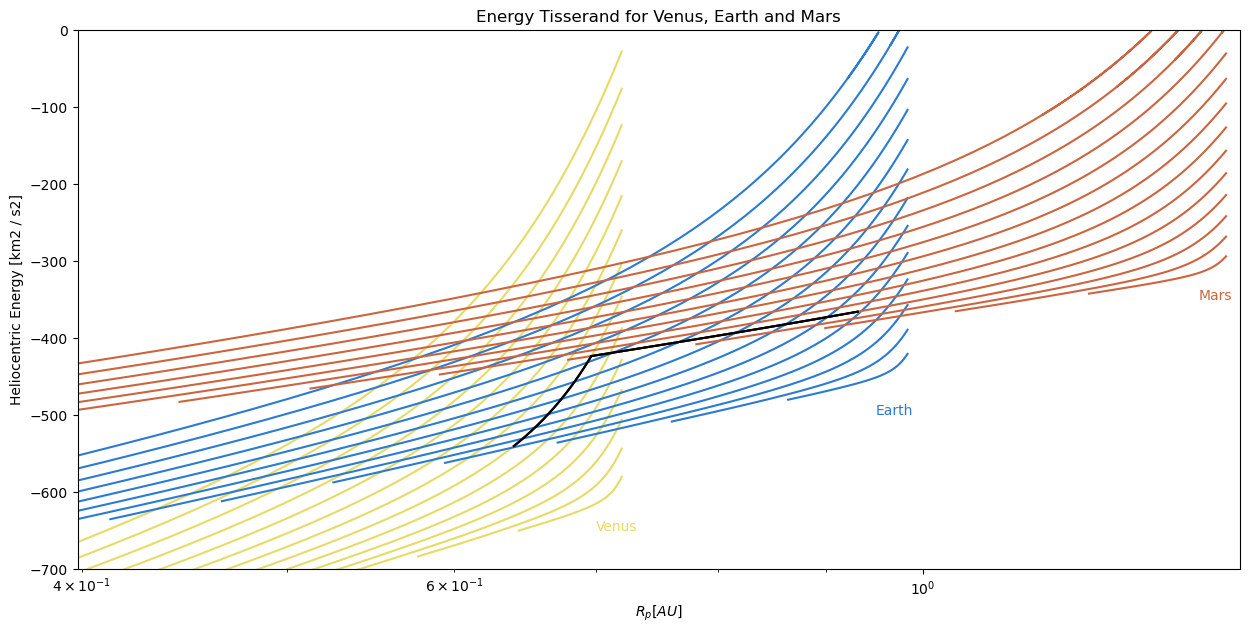

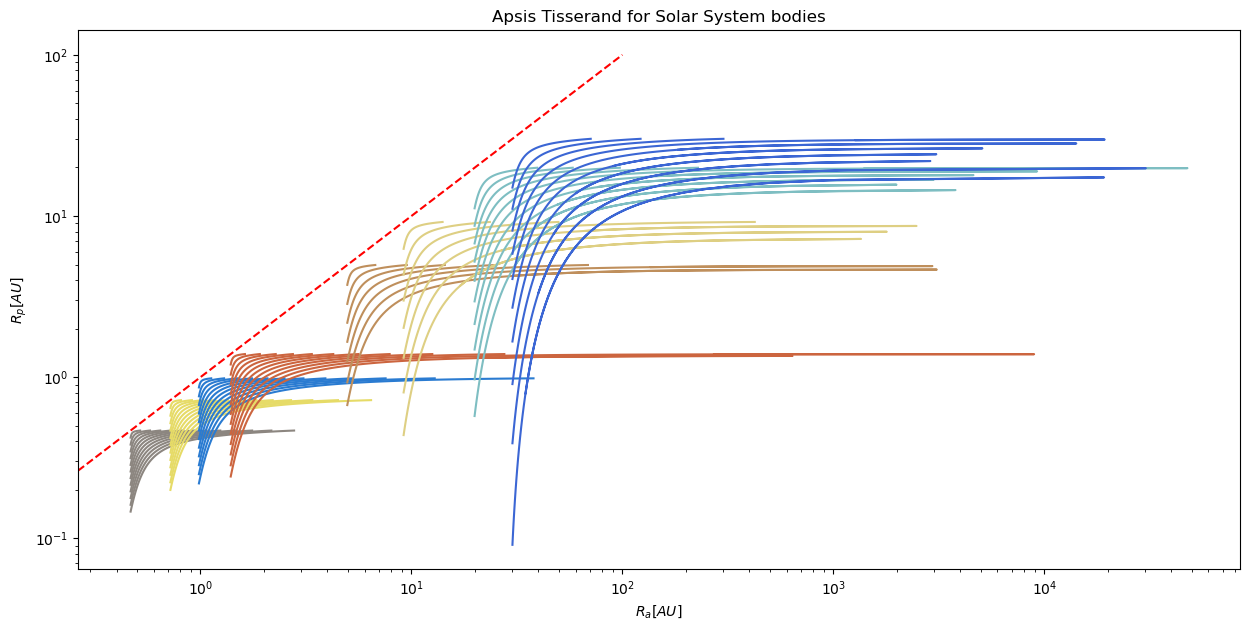

In [5]:
from astropy import units as u
from matplotlib import pyplot as plt
import numpy as np

from poliastro.bodies import Venus, Earth, Mars
from poliastro.plotting.tisserand import TisserandPlotter, TisserandKind
from poliastro.plotting._base import BODY_COLORS


# Show all possible Tisserand kinds
for kind in TisserandKind:
    print(f"{kind}", end="\t")

# Build custom axis
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title("Energy Tisserand for Venus, Earth and Mars")
ax.set_xlabel("$R_{p} [AU]$")
ax.set_ylabel("Heliocentric Energy [km2 / s2]")
ax.set_xscale("log")
ax.set_xlim(10**-0.4, 10**0.15)
ax.set_ylim(-700, 0)

# Generate a Tisserand plotter using [Specific Energy VS. Periapsis] plot
tp = TisserandPlotter(axes=ax, kind=TisserandKind.ENERGY)

# Plot Tisserand lines within 1km/s and 10km/s
for planet in [Venus, Earth, Mars]:
    ax = tp.plot(planet, (1, 14) * u.km / u.s, num_contours=14)

# Let us label previous figure
tp.ax.text(0.70, -650, "Venus", color=BODY_COLORS["Venus"])
tp.ax.text(0.95, -500, "Earth", color=BODY_COLORS["Earth"])
tp.ax.text(1.35, -350, "Mars", color=BODY_COLORS["Mars"])

# Plot final desired path by making use of `plot_line` method
ax = tp.plot_line(
    Venus,
    7 * u.km / u.s,
    alpha_lim=(47 * np.pi / 180, 78 * np.pi / 180),
    color="black",
)
ax = tp.plot_line(
    Mars,
    5 * u.km / u.s,
    alpha_lim=(119 * np.pi / 180, 164 * np.pi / 180),
    color="black",
)


# Let us import the rest of the planets
from poliastro.bodies import Mercury, Jupiter, Saturn, Uranus, Neptune

SS_BODIES_INNER = [
    Mercury,
    Venus,
    Earth,
    Mars,
]
SS_BODIES_OUTTER = [
    Jupiter,
    Saturn,
    Uranus,
    Neptune,
]

# Prellocate Tisserand figure
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title("Apsis Tisserand for Solar System bodies")
ax.set_xlabel("$R_{a} [AU]$")
ax.set_ylabel("$R_{p} [AU]$")
ax.set_xscale("log")
ax.set_yscale("log")

# Build tisserand
tp = TisserandPlotter(axes=ax, kind=TisserandKind.APSIS)

# Show perfect circular orbits
r = np.linspace(0, 10**2) * u.AU
tp.ax.plot(r, r, linestyle="--", color="red")

# Generate lines for inner planets
for planet in SS_BODIES_INNER:
    tp.plot(planet, (1, 12) * u.km / u.s, num_contours=12)

# Generate lines for outter planets
for planet in SS_BODIES_OUTTER:
    if planet == Jupiter or planet == Saturn:
        tp.plot(planet, (1, 7) * u.km / u.s, num_contours=7)
    else:
        tp.plot(planet, (1, 5) * u.km / u.s, num_contours=10)
